## Python-tesseract
It is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images.

https://pypi.org/project/pytesseract/

In [48]:
!brew install tesseract

To reinstall 4.0.0_1, run `brew reinstall tesseract`


In [49]:
!pip install pytesseract

You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
!pip install Pillow

You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
!pip install opencv-python

You should consider upgrading via the 'pip install --upgrade pip' command.


In [52]:
import pytesseract

from PIL import Image, ImageFilter

import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import cv2
import io




### Loading an image

In [53]:
seafood = Image.open("datasets/images/seafood.png")

print(seafood.format, seafood.size, seafood.mode)

PNG (587, 163) RGBA


* PNG file contains one additional channel, Alpha i.e opacity

In [54]:
type(seafood)

PIL.PngImagePlugin.PngImageFile

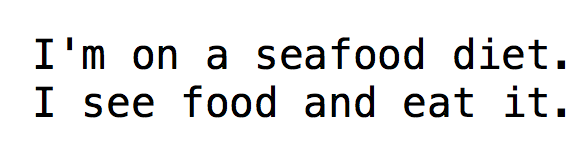

In [55]:
seafood

### Converting image to strings

In [56]:
text = pytesseract.image_to_string(seafood, lang = 'eng')

print(text)

I'm on a seafood diet.
I see food and eat it.


### Applying gaussian blur

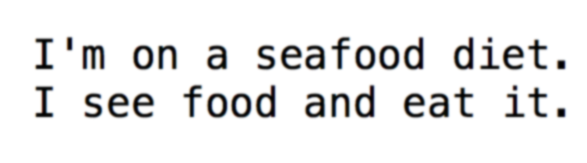

In [57]:
seafood_blur = seafood.filter(ImageFilter.GaussianBlur(1))
seafood_blur

In [58]:
text_blur = pytesseract.image_to_string(seafood_blur, lang = 'eng')

print(text_blur)

I'm on a seafood diet.
I see food and eat it.


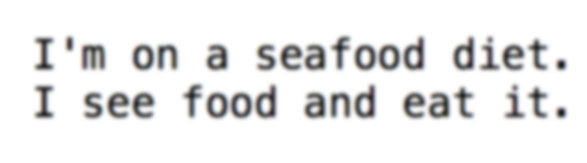

In [59]:
seafood_blur = seafood.filter(ImageFilter.GaussianBlur(2))
seafood_blur

In [60]:
seafood_blur = pytesseract.image_to_string(seafood_blur, lang = 'eng')

print(text_blur)

I'm on a seafood diet.
I see food and eat it.


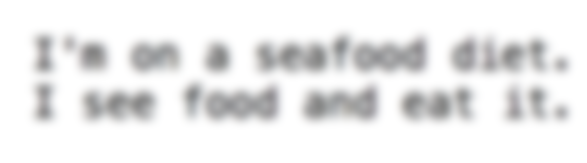

In [77]:
seafood_blur = seafood.filter(ImageFilter.GaussianBlur(5))
seafood_blur

### With higher blurring effect tesseract is unable print the strings

In [78]:
seafood_blur = pytesseract.image_to_string(seafood_blur, lang = 'eng')

print(text_blur)

I'm on a seafood diet.
I see food and eat it.


### Applying noise to image

In [63]:
seafood_array = np.array(seafood)

seafood_grey = color.rgb2gray(seafood_array)

noise = np.ones_like(seafood_grey) * 0.2 * (seafood_grey.max() - seafood_grey.min())

noise[np.random.random(size=noise.shape) > 0.5] *= -1

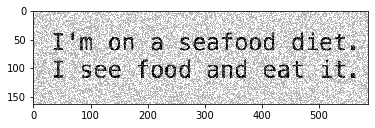

In [64]:
seafood_noisy = seafood_grey + noise

plt.imshow(seafood_noisy, cmap = 'gray')
plt.show()

### Pytesseract can not detect strings in noisy images

In [65]:
text_noisy = pytesseract.image_to_string(seafood_noisy , lang = 'eng')

print(text_noisy)

### String detection on flipped image

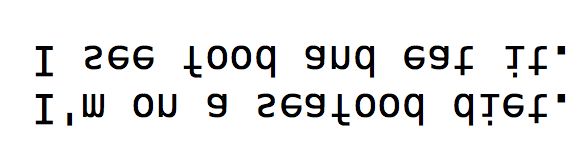

In [66]:
seafood_flipped = seafood.transpose(Image.FLIP_TOP_BOTTOM)
seafood_flipped

### Pytesseract can not detect the fliped image instead it detects based on how they literally look

In [67]:
text_flipped = pytesseract.image_to_string(seafood_flipped, lang = 'eng')

print(text_flipped)

I 266 ,00q 9uq 69F TL"
I,W OU 9 269,00q qI6s"


### String detection on rotated image

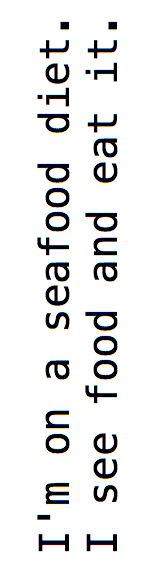

In [68]:
seafood_rotated = seafood.transpose(Image.ROTATE_90)
seafood_rotated

### Pytesseract can not detect the rotated image instead it detects based on how they literally look

In [69]:
text_rotated = pytesseract.image_to_string(seafood_rotated, lang = 'eng')

print(text_rotated)

"1T yea pue pooj aas J
"L9Tp poojeas e uo WT


### Get a searchable PDF

In [70]:
pdf_bytes = pytesseract.image_to_pdf_or_hocr('datasets/images/seafood.png', extension='pdf')

In [71]:
new_file = open("seafood.pdf", "wb")
new_file_byte_array = bytearray(pdf_bytes)

In [72]:
new_file.write(new_file_byte_array)
new_file.close()

* The file will be available where the notebook presents